In [5]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
#!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d slothkong/10-monkey-species

100% 547M/547M [00:04<00:00, 94.8MB/s]
100% 547M/547M [00:04<00:00, 125MB/s] 


In [9]:
import zipfile

input_zip = '10-monkey-species.zip'
zip_ref = zipfile.ZipFile(input_zip, 'r')
zip_ref.extractall('/content/monkey_data')

In [18]:
!mv -v /content/moneky_data/training/training/* /content/moneky_data/training
!mv -v /content/moneky_data/validation/validation/* /content/moneky_data/validation/
!rm -d /content/moneky_data/training/training
!rm -d /content/moneky_data/validation/validation

In [22]:
import os
TRAINING_DATA = '/content/moneky_data/training'
VALIDATION_DATA = '/content/moneky_data/validation'

class_dirs_training = os.listdir(TRAINING_DATA)
class_dirs_validation = os.listdir(VALIDATION_DATA)

sum = 0
for dir in class_dirs_training:
  sum = sum + len(os.listdir(os.path.join(TRAINING_DATA, dir)))
  print("Class " + dir + "| num: " + str(len(os.listdir(os.path.join(TRAINING_DATA, dir)))))

print(sum)
print('---------------------')

sum = 0
for dir in class_dirs_validation:
  print("Class " + dir + "| num: " + str(len(os.listdir(os.path.join(VALIDATION_DATA, dir)))))
  sum = sum + len(os.listdir(os.path.join(VALIDATION_DATA, dir)))
print(sum)

Class n4| num: 105
Class n7| num: 114
Class n8| num: 106
Class n6| num: 106
Class n9| num: 106
Class n1| num: 111
Class n5| num: 113
Class n0| num: 105
Class n2| num: 110
Class n3| num: 122
1098
---------------------
Class n4| num: 26
Class n7| num: 28
Class n8| num: 27
Class n6| num: 26
Class n9| num: 26
Class n1| num: 28
Class n5| num: 28
Class n0| num: 26
Class n2| num: 27
Class n3| num: 30
272


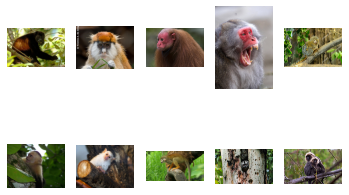

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n0', 'n0018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n1', 'n1018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n2', 'n2018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n3', 'n3020.jpg'))
plt.imshow(img)


sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n4', 'n4018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n5', 'n5018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n6', 'n6018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n7', 'n7019.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n8', 'n8018.jpg'))
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread(os.path.join(TRAINING_DATA, 'n9', 'n9018.jpg'))
plt.imshow(img)



In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_dataflow = train_datagen.flow_from_directory(
    TRAINING_DATA,
    target_size=(243, 243),
    batch_size=32,
    class_mode='categorical'
)

validation_dataflow = validation_datagen.flow_from_directory(
    VALIDATION_DATA,
    target_size=(243, 243),
    batch_size=32,
    class_mode='categorical'
)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [25]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

base_model = VGG16(input_shape = (224, 224, 3),
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(0.001), metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
history = model.fit_generator(
    train_dataflow, 
    steps_per_epoch=35, 
    epochs=10, 
    verbose=1, 
    validation_data=validation_dataflow,
    validation_steps=9
  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
35/35 [==============================] - 837s 24s/step - loss: 20.2921 - accuracy: 0.1182 - val_loss: 2.3188 - val_accuracy: 0.4081
Epoch 2/10
35/35 [==============================] - 837s 24s/step - loss: 3.0072 - accuracy: 0.2688 - val_loss: 2.4829 - val_accuracy: 0.3529
Epoch 3/10
35/35 [==============================] - 833s 24s/step - loss: 2.8330 - accuracy: 0.3138 - val_loss: 1.6728 - val_accuracy: 0.4853
Epoch 4/10
35/35 [==============================] - 839s 24s/step - loss: 2.0625 - accuracy: 0.4441 - val_loss: 1.5271 - val_accuracy: 0.5441
Epoch 5/10
35/35 [==============================] - 835s 24s/step - loss: 1.6159 - accuracy: 0.5026 - val_loss: 1.8312 - val_accuracy: 0.5846
Epoch 6/10
35/35 [==============================] - 833s 24s/step - loss: 1.4101 - accuracy: 0.5828 - val_loss: 1.3995 - val_accuracy: 0.5809
Epoch 7/10
35/35 [==============================] - 832s 24s/step - loss: 1.5508 - accuracy: 0.5259 - val_loss: 1.0307 - val_accuracy: 0.6324
Epoch

In [1]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

NameError: ignored

In [ ]:
from keras.preprocessing import image

img = image.load_img(path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classification = model.predict(images)